In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0],True)
#if len(physical_devices) > 0:
#    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [3]:
img_array=cv2.imread("data/chest_xray/train/PNEUMONIA/person1_bacteria_1.jpeg")

In [11]:
img_array.shape

(439, 712, 3)

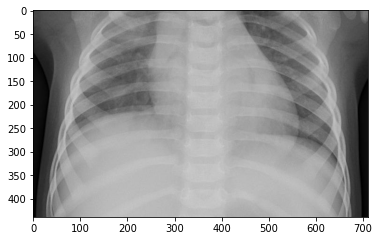

In [12]:
plt.imshow(img_array)

In [13]:
Classes={"PNEUMONIA":1,"NORMAL":0}

In [14]:
DataDirectory_train="data/chest_xray/train/" #Training Data
DataDirectory_test="data/chest_xray/test/" #Testing Data


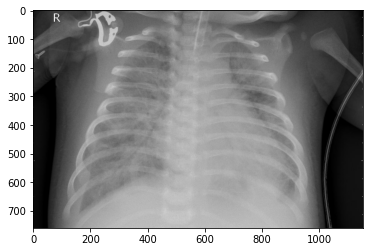

PNEUMONIA


In [17]:
for cls in Classes:
        path=os.path.join(DataDirectory_train,cls) #Address of images of a class
        for img in os.listdir(path):
            
            img_array=cv2.imread(os.path.join(path,img))
            plt.imshow(img_array)
            plt.show()
            print(cls)
            break
            #new_array=cv2.reshape(img_array,(img_size,img_size))
            #Training_Data.append([new_array,class_num])
        break

In [18]:
img_size=100

# Training Data

In [19]:
xtrain=[]
ytrain=[]
def DataGenerate_train():
    for cls in Classes:
        path=os.path.join(DataDirectory_train,cls) #Address of images of a class
        #class_num=Classes.index(cls)
        for img in os.listdir(path):
            try:
                img_array=(cv2.imread(os.path.join(path,img)))
                new_array=(cv2.resize(img_array,(img_size,img_size)))
                xtrain.append(list(new_array/255))
                ytrain.append(Classes[cls])
                #Training_Data.append([new_array,class_num])
            except Exception as e:
                pass
        
    
    

# Testing Data

In [20]:
xtest=[]
ytest=[]
def DataGenerate_test():
    for cls in Classes:
        path=os.path.join(DataDirectory_test,cls) #Address of images of a class
        #class_num=Classes.index(cls)
        for img in os.listdir(path):
            try:
                img_array=(cv2.imread(os.path.join(path,img)))
                new_array=(cv2.resize(img_array,(img_size,img_size)))
                xtest.append(list(new_array/255))
                ytest.append(Classes[cls])
                #Training_Data.append([new_array,class_num])
            except Exception as e:
                pass
        
    
    

In [21]:
DataGenerate_train()
DataGenerate_test()


In [22]:
print(len(xtrain),len(ytrain))
print(len(xtest),len(ytest))

5216 5216
624 624


In [23]:
xtrain=np.array(xtrain)
ytrain=np.array(ytrain)
xtest=np.array(xtest)
ytest=np.array(ytest)

In [24]:
print("The shape of xtrain",xtrain.shape)
print("The shape of ytrain ",ytrain.shape)
print("The shape of xtrain",xtest.shape)
print("The shape of ytrain ",ytest.shape)

The shape of xtrain (5216, 100, 100, 3)
The shape of ytrain  (5216,)
The shape of xtrain (624, 100, 100, 3)
The shape of ytrain  (624,)


In [25]:
ytrain

array([1, 1, 1, ..., 0, 0, 0])

In [26]:
# Build the model:
model=keras.models.Sequential([
        keras.layers.Conv2D(256,kernel_size=(5,5),activation="relu",input_shape=(img_size,img_size,3)),
        keras.layers.Conv2D(124,kernel_size=(5,5),activation="relu"),
        keras.layers.MaxPool2D(pool_size=(4,4),strides=(2,2)),
        keras.layers.Conv2D(64,(3,3),activation="relu"),
        keras.layers.Conv2D(32,(3,3),activation="relu"),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(512,activation="relu"),
        keras.layers.Dense(256,activation="relu"),
        keras.layers.Dense(64,activation="relu"),
        keras.layers.Dropout(rate=0.5) ,
        keras.layers.Dense(2,activation="softmax"),

        ])

In [27]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 256)       19456     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 124)       793724    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 45, 124)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 43, 43, 64)        71488     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 41, 41, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0

In [28]:
model.fit(xtrain,ytrain,epochs=10,batch_size=20,verbose=1)

Epoch 1/10
261/261 [==============================] - 68s 204ms/step - loss: 0.6309 - accuracy: 0.7328
Epoch 2/10
261/261 [==============================] - 51s 195ms/step - loss: 0.2369 - accuracy: 0.9162
Epoch 3/10
261/261 [==============================] - 51s 196ms/step - loss: 0.1430 - accuracy: 0.9465
Epoch 4/10
261/261 [==============================] - 51s 195ms/step - loss: 0.1019 - accuracy: 0.9612
Epoch 5/10
261/261 [==============================] - 51s 196ms/step - loss: 0.0951 - accuracy: 0.9615
Epoch 6/10
261/261 [==============================] - 51s 197ms/step - loss: 0.0881 - accuracy: 0.9701
Epoch 7/10
261/261 [==============================] - 51s 197ms/step - loss: 0.1135 - accuracy: 0.9607
Epoch 8/10
261/261 [==============================] - 52s 197ms/step - loss: 0.0675 - accuracy: 0.9776
Epoch 9/10
261/261 [==============================] - 52s 197ms/step - loss: 0.0552 - accuracy: 0.9852s - loss: 0.0550 - 
Epoch 10/10
261/261 [==============================] -

In [29]:
model.save('Pneumonia_CNN_normalized_Data.h5')

In [30]:
model_loss,model_accuracy=model.evaluate(xtest,ytest)
print(model_loss,model_accuracy)

20/20 [==============================] - 6s 58ms/step - loss: 2.2241 - accuracy: 0.7772
2.224118709564209 0.7772436141967773


In [32]:
print(model_accuracy)

0.7772436141967773


In [2]:
my_model = tf.keras.models.load_model('Pneumonia_CNN_normalized_Data.h5')

In [4]:
predict_type="data/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg"
img_size=100
img_array=cv2.imread(predict_type)
img_array=cv2.resize(img_array,(img_size,img_size))
img_array=img_array/255
img_array=np.array(img_array).reshape(-1,img_size,img_size,3)

In [5]:
img_array.shape

(1, 100, 100, 3)

In [108]:
preds=model.predict(img_array)

In [109]:
preds_class = np.argmax(preds, axis=-1)

In [110]:
preds_class

array([0], dtype=int64)